# Step 1 : Data Loading and Data Understanding

In [85]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [8]:
#!pip install scikit-learn

In [86]:
# Create Dataset by reading the Day.csv file

bikesharedata = pd.read_csv("C:\ProgramData\day.csv")

### Data Inspection

In [87]:
# Check  the head of Data Set
bikesharedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [88]:
# Check the Shape of Data Set
bikesharedata.shape

(730, 16)

In [89]:
# Identify mean medium , Mode , Standard deviation for the Data Set
bikesharedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [90]:
# Get information about the dataset columns
bikesharedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2 : Visualising the Data

### If there is some obvious multicollinearity going on
### Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
### We'll visualise our data using matplotlib and seaborn.

### Visualising Numeric Variables
### Let's make a pairplot of all the numeric variables

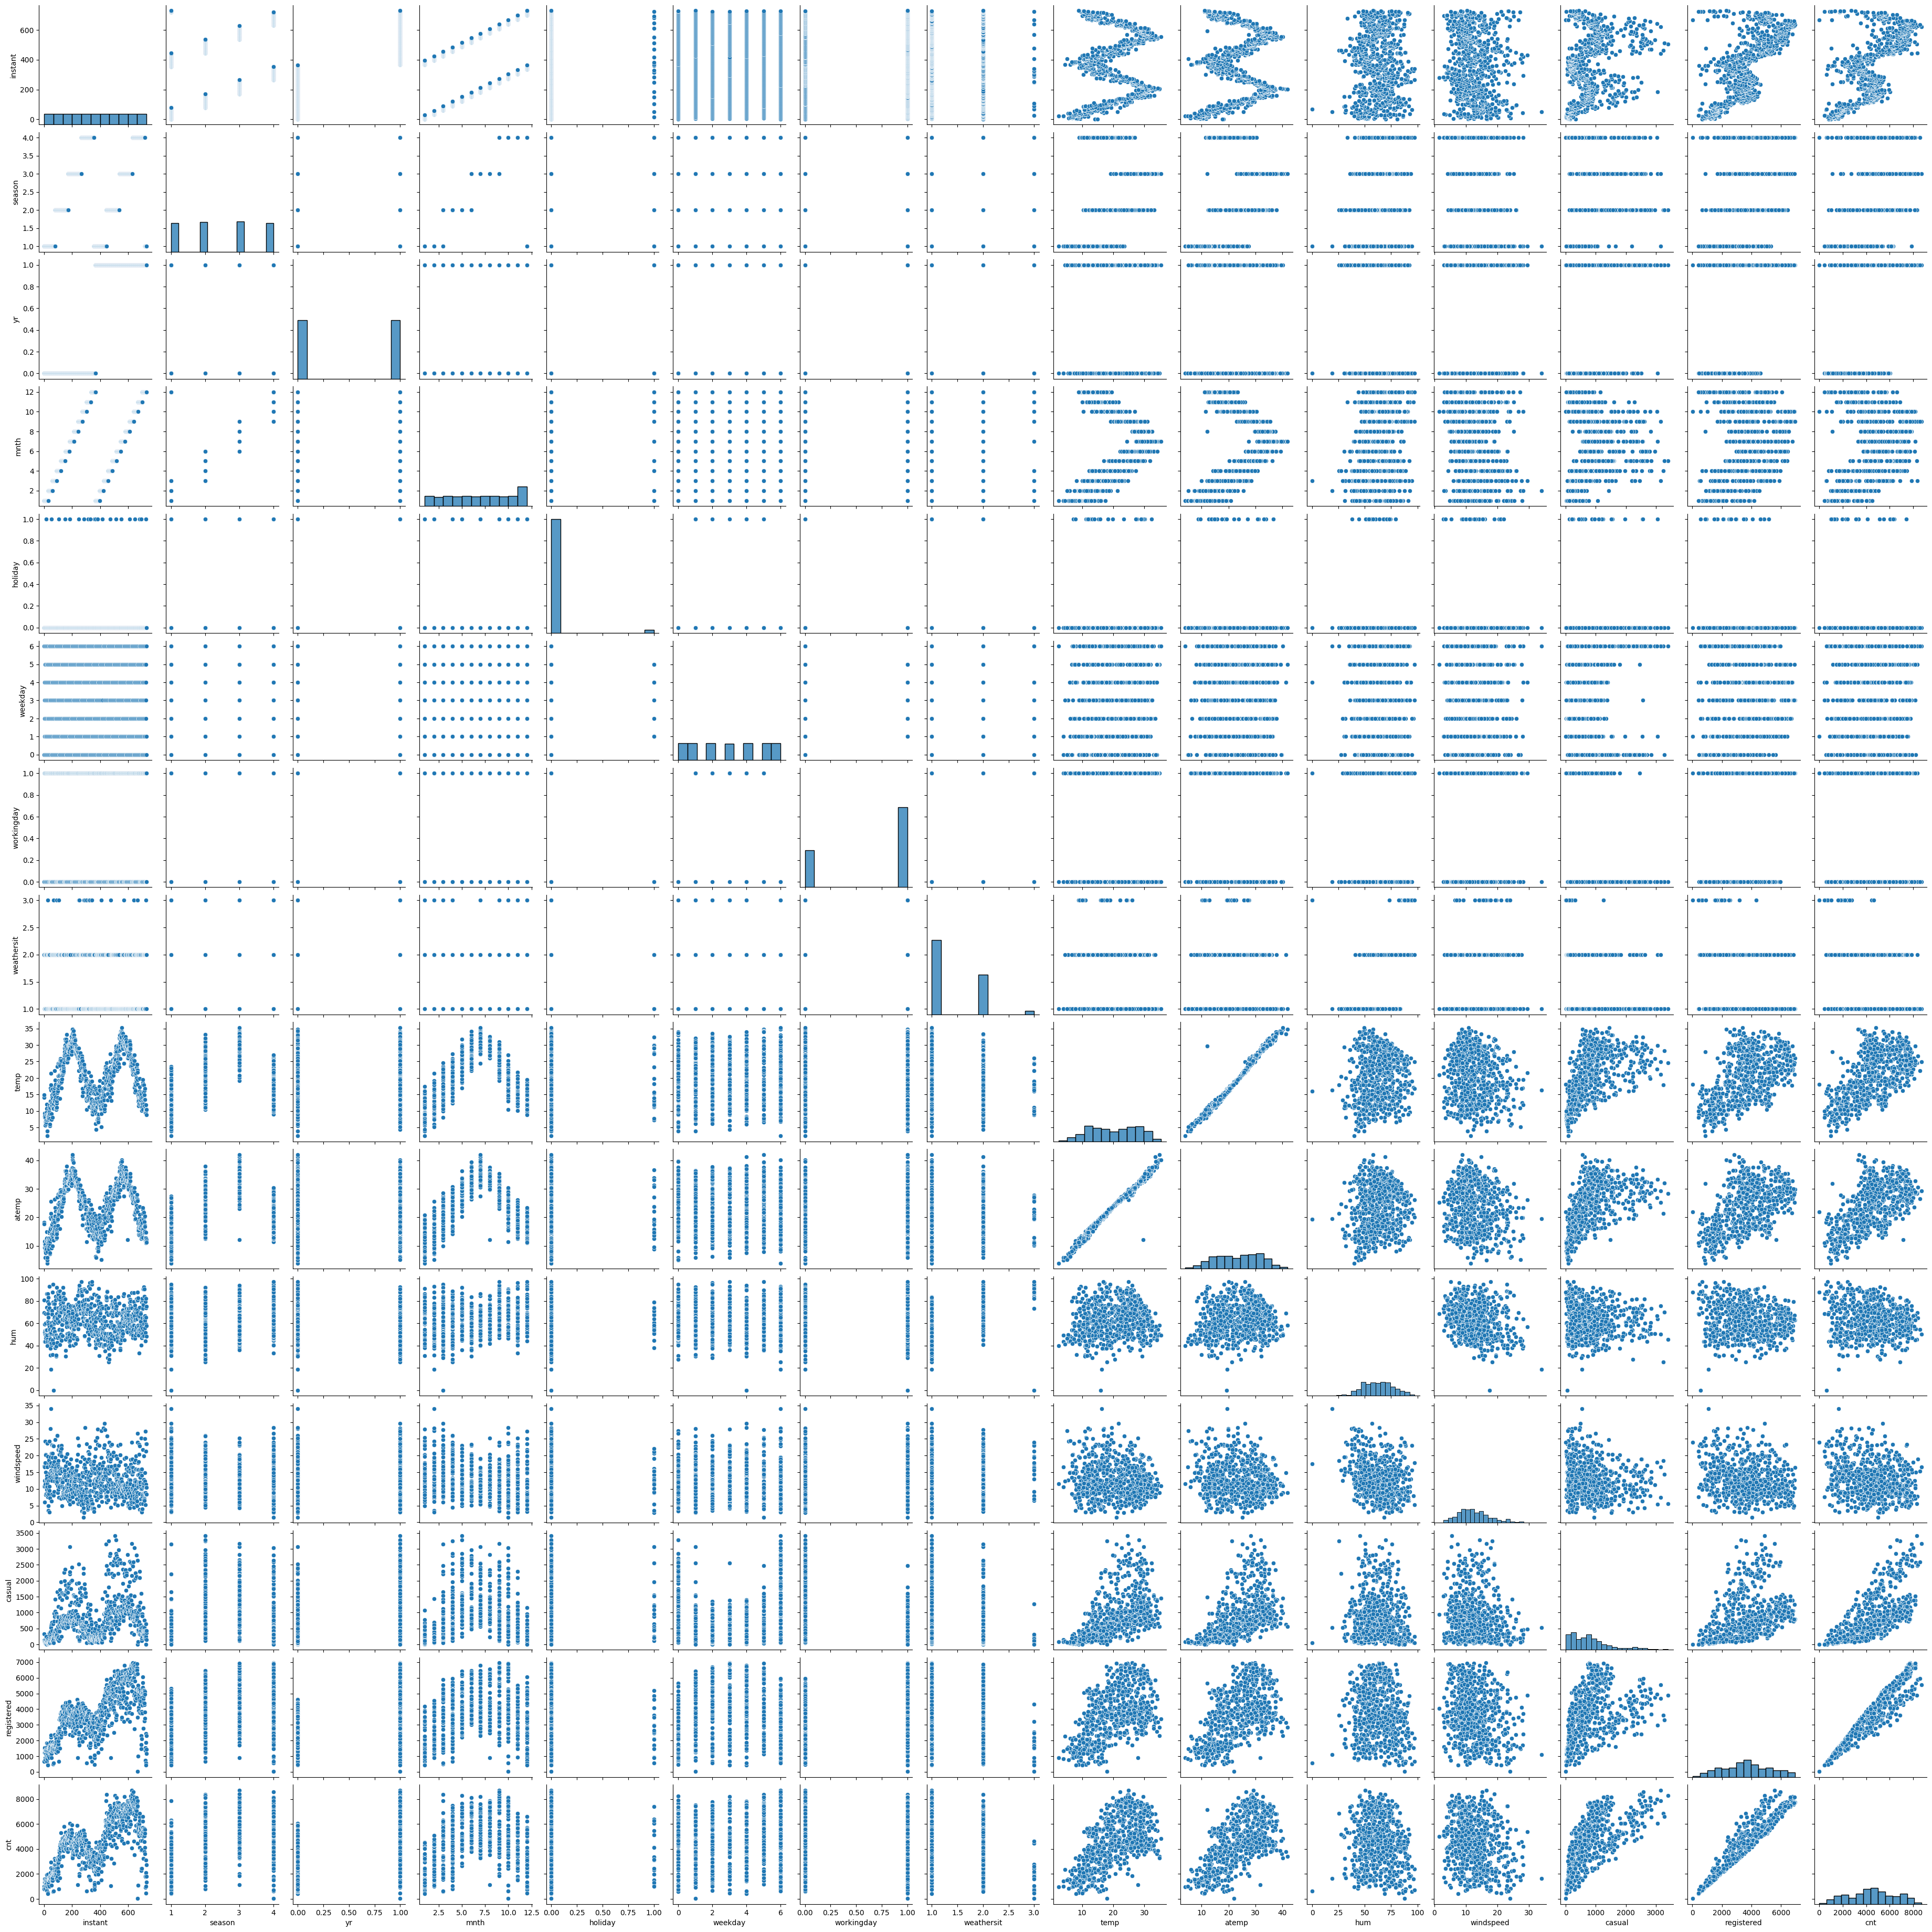

In [67]:
sns.pairplot(bikesharedata)
plt.show()

### Visualising Categorical Variables by using boxplot

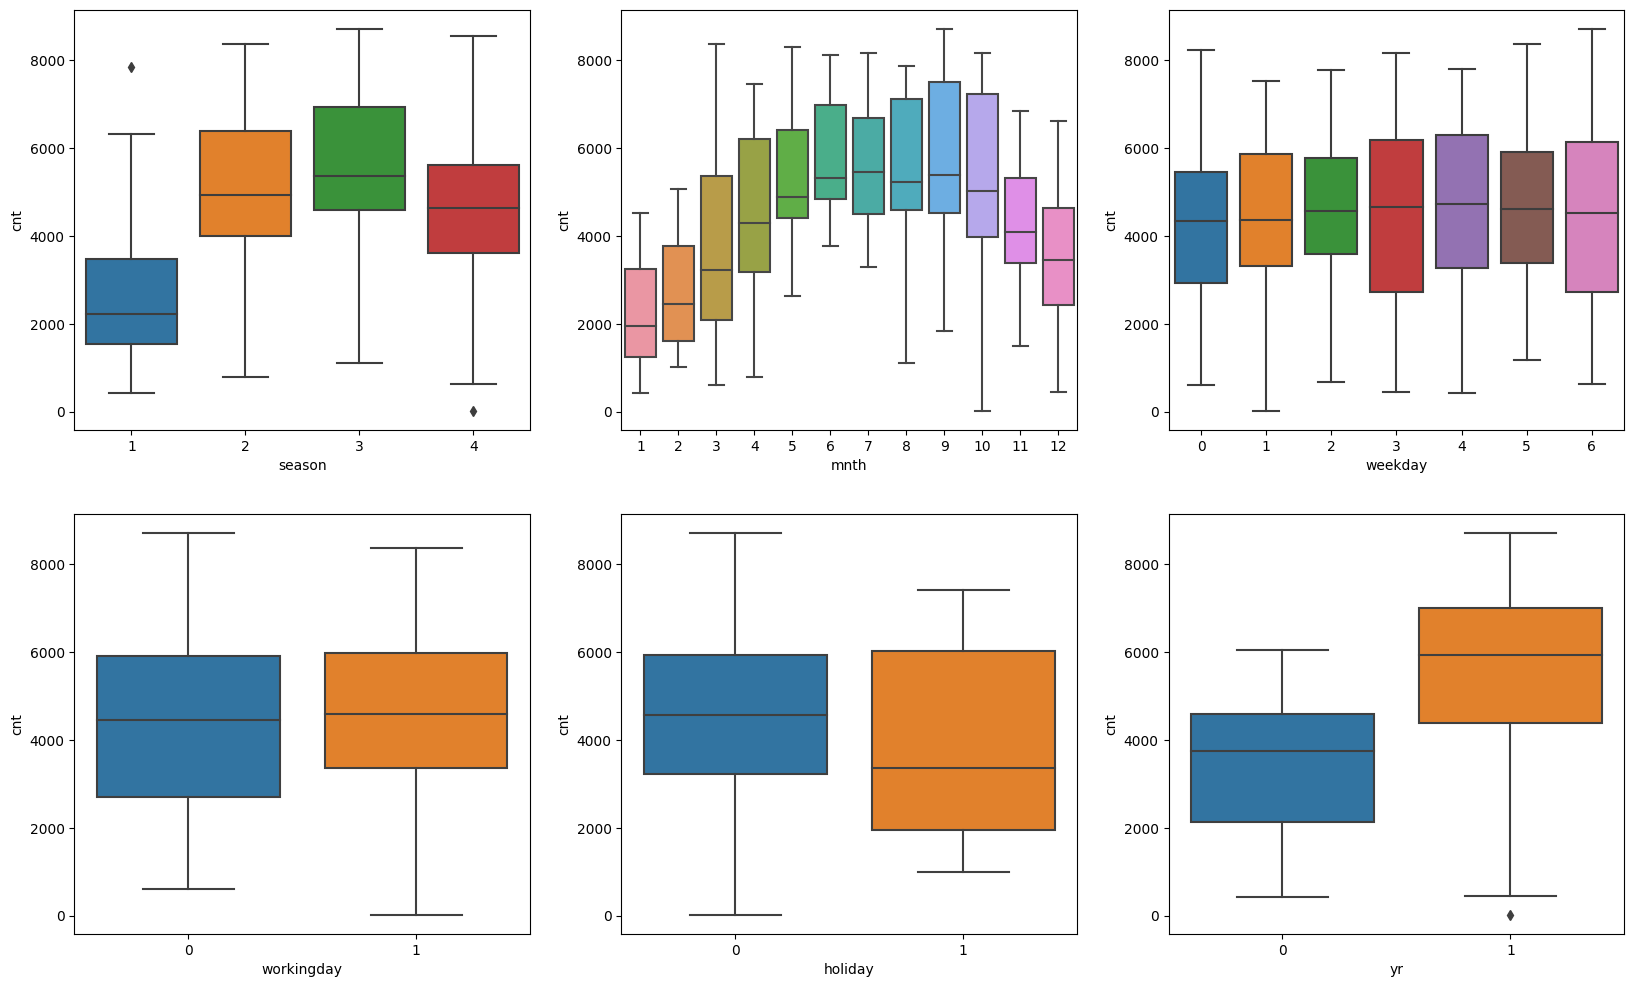

In [91]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharedata)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharedata)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharedata)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharedata)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharedata)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharedata)
plt.show()

### Further Exploratory Data Analysis

### Univariate Analysis

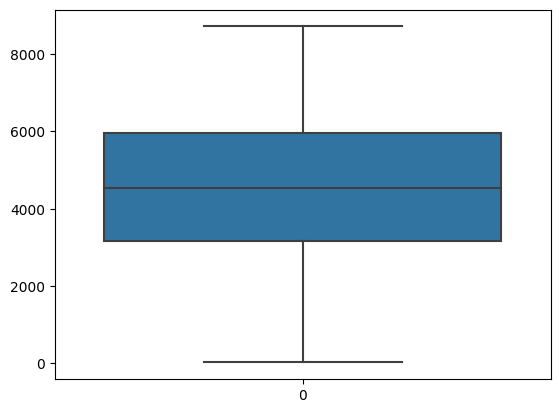

In [92]:
#Target variable is count as we are modelling the demand for shared bike rides from point a to point b
sns.boxplot(bikesharedata['cnt'])
plt.show()

### Bivariate Analysis

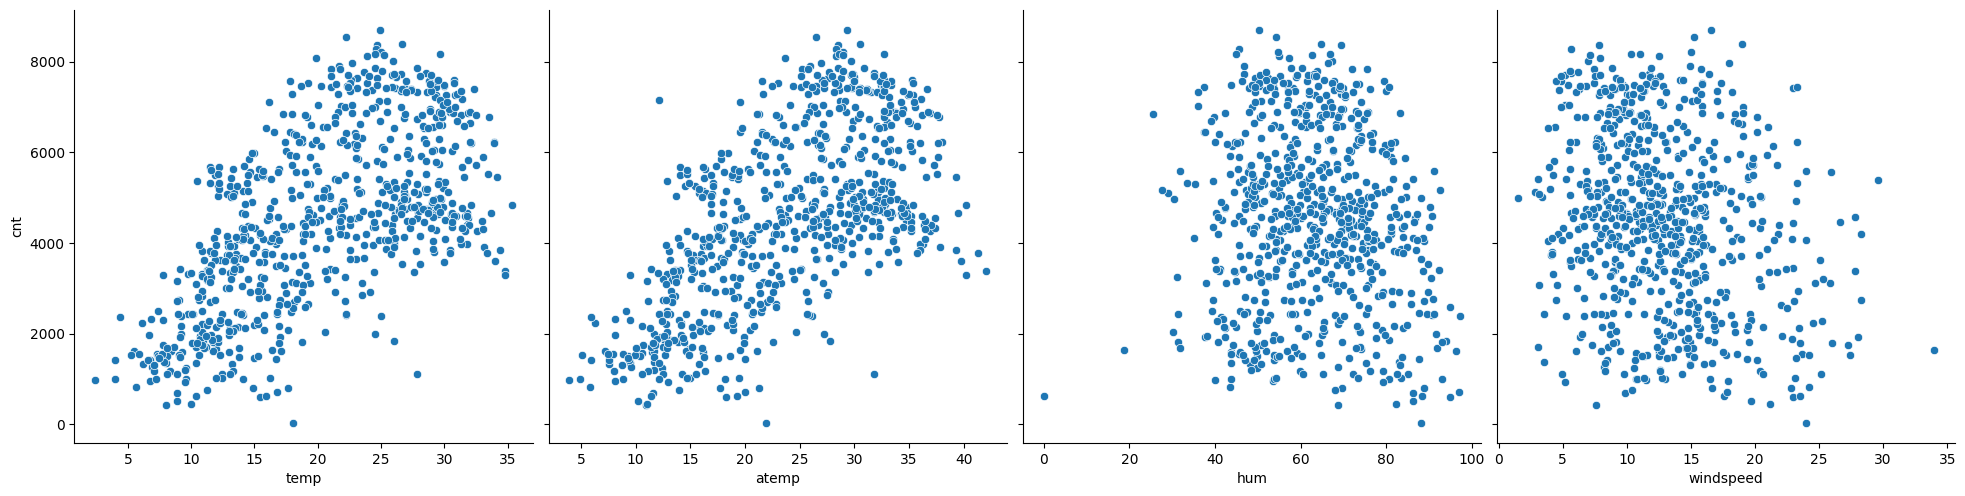

In [93]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(bikesharedata, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt', height=5, aspect=1, kind='scatter')
plt.show()

### Multivariate Analysis

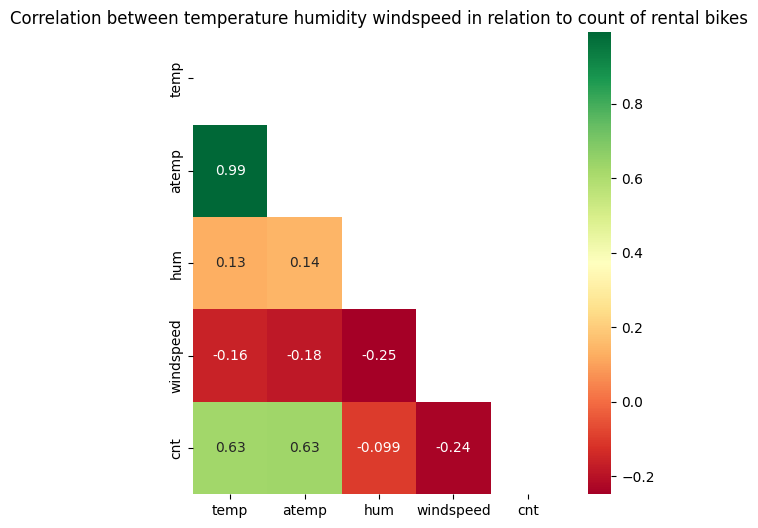

In [94]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharedata[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bikesharedata[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between temperature humidity windspeed in relation to count of rental bikes")
plt.show()

### There is multicolinearity between temp and atemp so these variables cannot be used as linear relationship exists .

# Step 3 : Data Preparation

### Data Cleansing

In [95]:
# Check for null values
bikesharedata.isnull().sum()*100/bikesharedata.shape[0]
# There are no NULL values in the dataset, hence it is clean.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

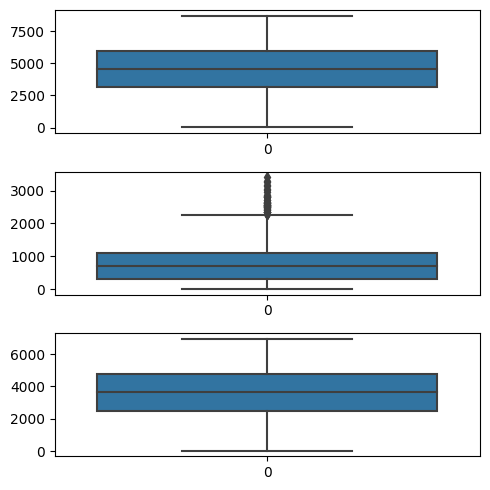

In [96]:
#Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(bikesharedata['cnt'], ax = axs[0])
plt2 = sns.boxplot(bikesharedata['casual'], ax = axs[1])
plt3 = sns.boxplot(bikesharedata['registered'], ax = axs[2])

plt.tight_layout()

In [61]:
# There are no considerable outliers present in the bike share data so no need to remove outliers

### Dropping redundant Variables

In [97]:
# dropping redundant columns casual and registered as these total upto cnt (count)

bikesharedata.drop(['casual','registered'], axis = 1, inplace = True)

In [98]:
# Dropping two more columns on further analysis . Date is redundant as we have year and month. 
#instant is nothing but row index which is irrelevant

bikesharedata.drop(['instant','dteday'], axis = 1, inplace = True)

In [99]:
#Checking if columns dropped 
bikesharedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [100]:
#Checking the heads of the dataset
bikesharedata.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [101]:
# Let's drop the first column from status df using 'drop_first = True'

months_df = pd.get_dummies(bikesharedata['mnth'], drop_first = True)
weekdays_df = pd.get_dummies(bikesharedata['weekday'], drop_first = True)
weathersit_df = pd.get_dummies(bikesharedata['weathersit'], drop_first = True)
seasons_df = pd.get_dummies(bikesharedata['season'], drop_first = True)

In [102]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikesharedata.mnth,dtype=float)
weekdays_df=pd.get_dummies(bikesharedata.weekday,dtype=float)
weathersit_df=pd.get_dummies(bikesharedata.weathersit,dtype=float)
seasons_df=pd.get_dummies(bikesharedata.season,dtype=float)

In [103]:
bikesharedata.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [104]:
# Merging  the dataframe, with the dummy variable dataset. 

bikesharedata = pd.concat([bikesharedata,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [105]:
# Now let's see the head of our dataframe.
bikesharedata.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  ...    4    5    6    1    2    3    1    2    3    4  
0  18.18125  80.5833  ...  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
1  17.68695  69.6087  ...  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
2   9.47025  43.7273  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
3  10.60610  59.0435  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
4  11.46350  43.6957  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 38 columns]

In [106]:
# # Drop all variables for which we have created the dummies for

bikesharedata.drop(['mnth'], axis = 1, inplace = True)
bikesharedata.drop(['weekday'], axis = 1, inplace = True)
bikesharedata.drop(['weathersit'], axis = 1, inplace = True)
bikesharedata.drop(['season'], axis = 1, inplace = True)

In [107]:
# Now let's see the head of our dataframe.
bikesharedata.head()


yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

     1    2  ...    4    5    6    1    2    3    1    2    3    4  
0  1.0  0.0  ...  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
1  1.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
2  1.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
3  1.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
4  1.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 34 columns]

# Step 4 : Splitting the Data into Training and Testing Sets

In [108]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharedata, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [111]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr', 'temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [112]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653  1.0        0           1  0.509887  0.501133  0.575354   0.300794   
576  1.0        0           1  0.815169  0.766351  0.725633   0.264686   
426  1.0        0           0  0.442393  0.438975  0.640189   0.255342   
728  1.0        0           0  0.245101  0.200348  0.498067   0.663106   
482  1.0        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt    1    2  ...    4    5    6    1    2    3    1    2    3    4  
653  0.864243  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
576  0.827658  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
426  0.465255  0.0  0.0  ...  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
728  0.204096  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
482  0.482973  0.0  0.0  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 34 columns]

In [113]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt           1           2  ...           4  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.088235    0.066667  ...    0.133333   
std      0.169797    0.224593    0.283915    0.249689  ...    0.340268   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

                5           6           1           2           3           1  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.127451    0.154902    0.627451    0.343137    0.029412    0.243137   
std      0.333805    0.362166    0.483958    0.475223    0.169124    0.429398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                2           3          4  
count  510.000000  510.000000  510.00000  
mean     0.245098    0.262745    0.24902  
std      0.430568    0.440557    0.43287  
min      0.000000    0.000000    0.00000  
25%      0.000000    0.000000    0.00000  
50%      0.000000    0.000000    0.00000  
75%      0.000000    1.000000    0.00000  
max      1.000000    1.000000    1.00000  

[8 rows x 34 columns]

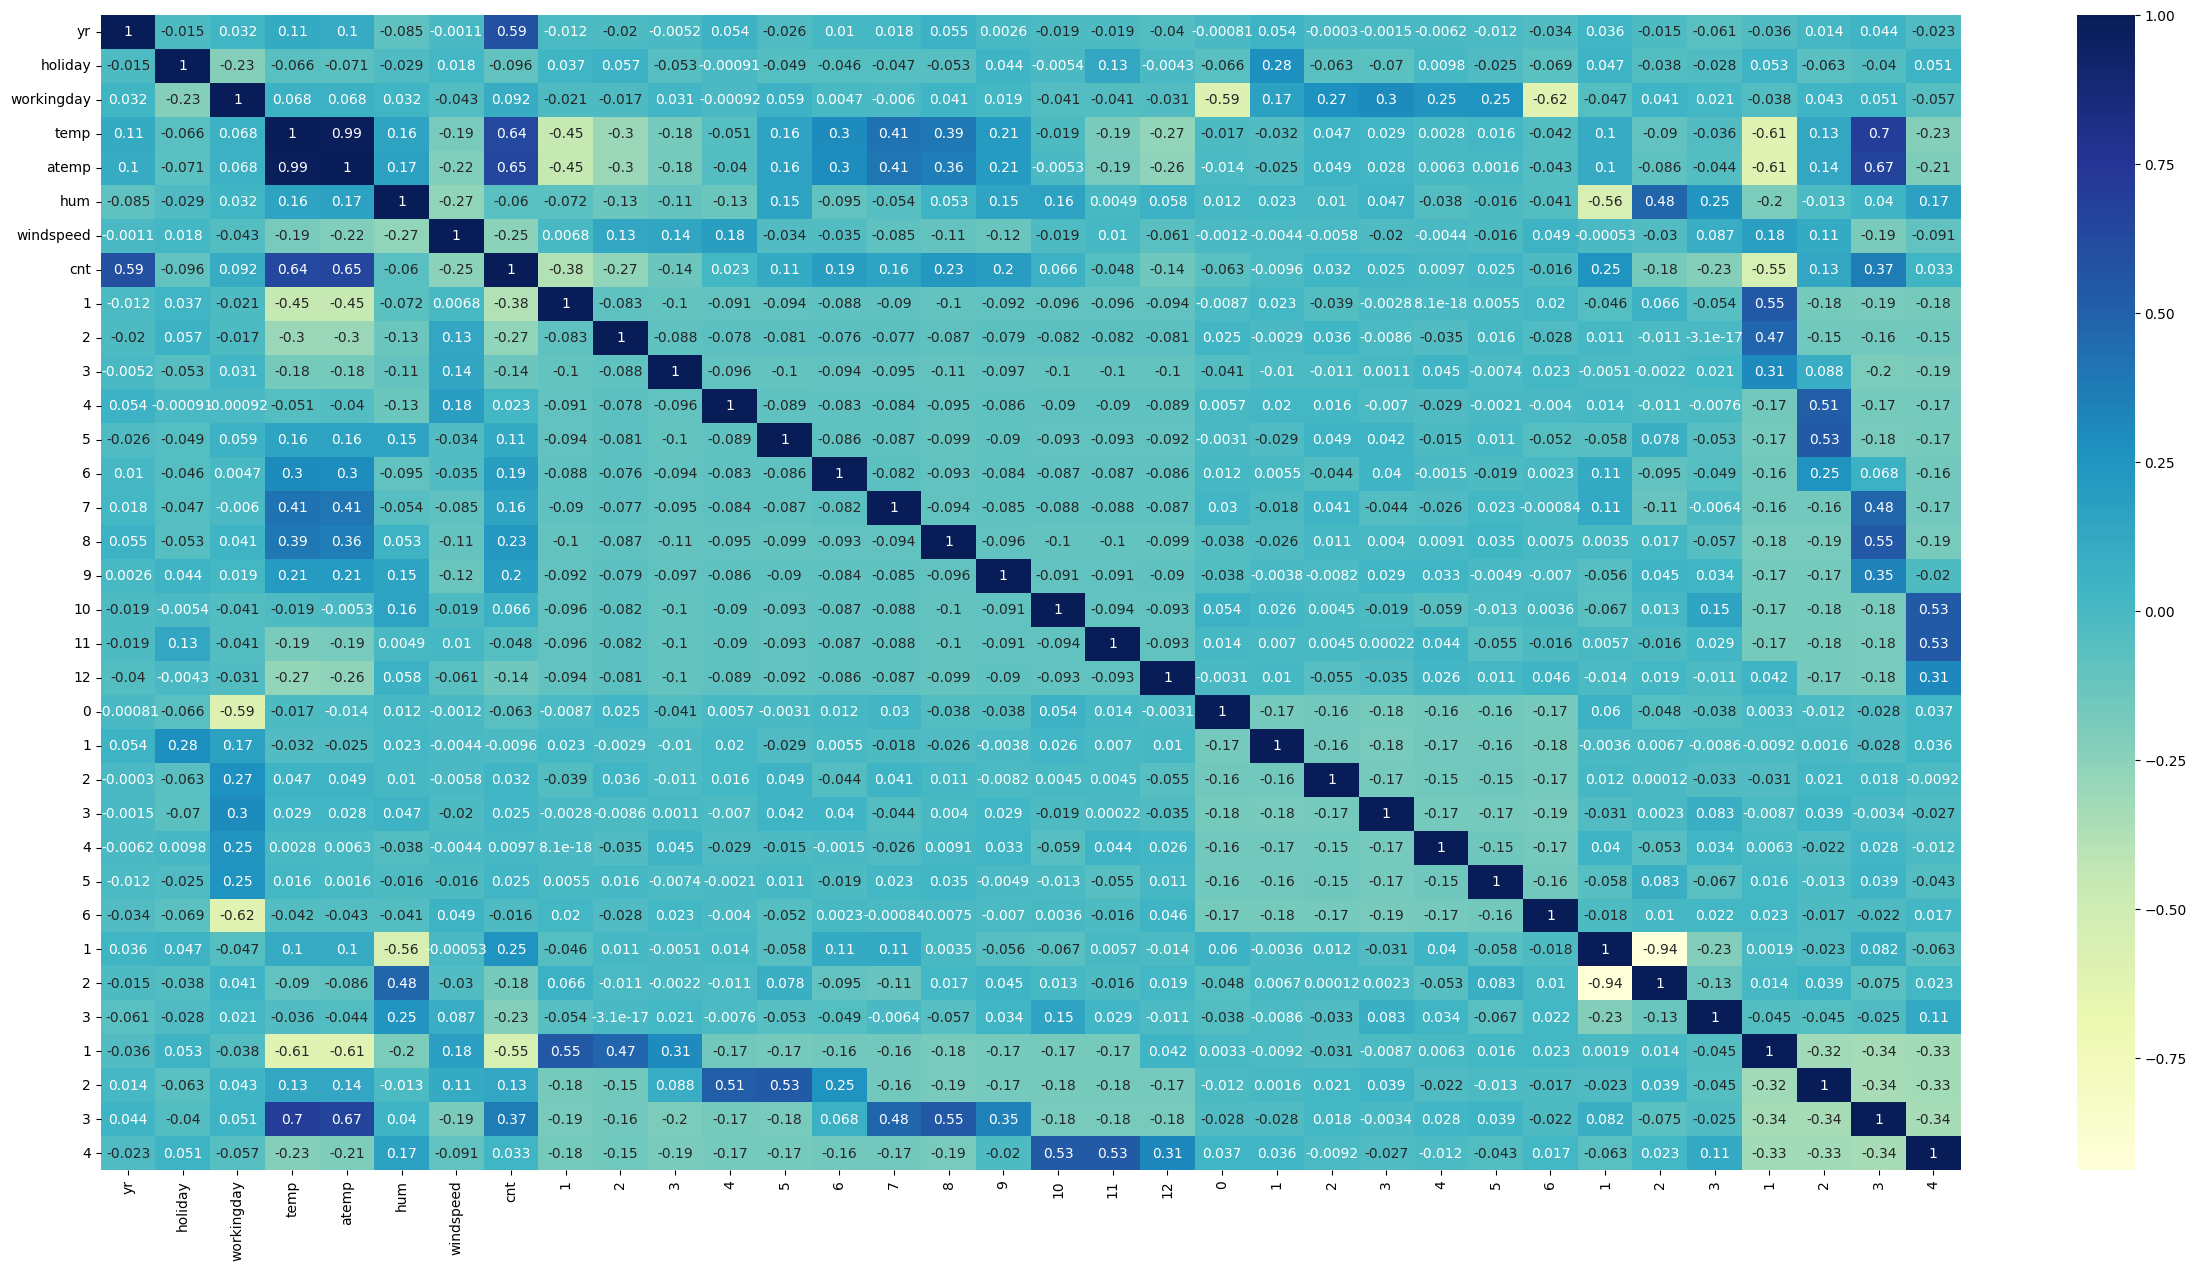

In [160]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to count of rental bikes the most. Let's see a pairplot for temp vs cnt.

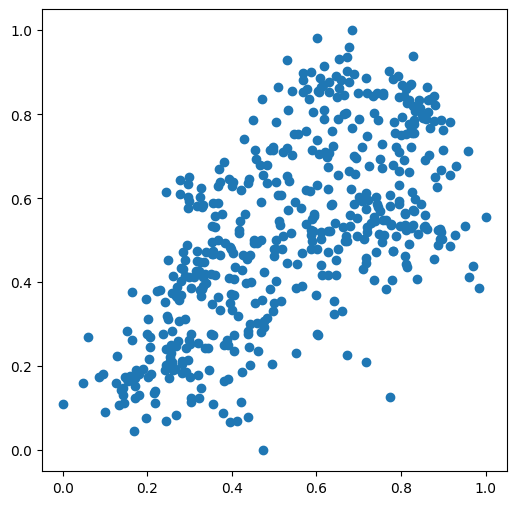

In [114]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So we pick temp as the first variable and we will try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [115]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a linear model

### Fit a regression line through the training data using statsmodels

In [116]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [117]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

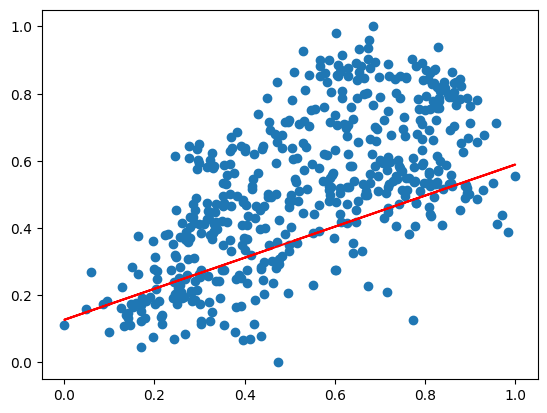

In [118]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [119]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           5.80e-61
Time:                        11:19:53   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. 
So let's go ahead and add the second most highly correlated variable, i.e. workingday.

In [120]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'workingday']]

In [121]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.155697
temp          0.636654
workingday    0.023464
dtype: float64

In [122]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     180.9
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.92e-60
Time:                        11:20:11   Log-Likelihood:                 175.88
No. Observations:                 510   AIC:                            -345.8
Df Residuals:                     507   BIC:                            -333.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1557      0.022      7.088      0.0

This has barely improved the model so let's add another variable

In [123]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'workingday','atemp']]

In [124]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.149404
temp          0.180227
workingday    0.023300
atemp         0.490507
dtype: float64

In [125]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     122.6
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.07e-59
Time:                        11:20:21   Log-Likelihood:                 177.84
No. Observations:                 510   AIC:                            -347.7
Df Residuals:                     506   BIC:                            -330.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1494      0.022      6.750      0.0

This has barely improved the model so let's add another variable

In [126]:
# Assign year  feature variables to X
X_train_lm = X_train[['temp', 'workingday','atemp','yr']]

In [127]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.062286
temp          0.075278
workingday    0.017032
atemp         0.543617
yr            0.237275
dtype: float64

In [128]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     290.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          1.97e-129
Time:                        11:21:12   Log-Likelihood:                 343.03
No. Observations:                 510   AIC:                            -676.1
Df Residuals:                     505   BIC:                            -654.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0623      0.017      3.768      0.0

In [129]:
# Assign all the  feature variables to X
X_train_lm = X_train[['temp', 'workingday','atemp','yr','holiday','hum','windspeed']]

### Adding all the variables to the model

In [130]:
bikesharedata.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                  0,            1,            2,            3,            4,
                  5,            6,            1,            2,            3,
                  1,            2,            3,            4],
      dtype='object')

In [131]:
# Check the data types of the DataFrame
print(bikesharedata.dtypes)

yr              int64
holiday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
10            float64
11            float64
12            float64
0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
1             float64
2             float64
3             float64
1             float64
2             float64
3             float64
4             float64
dtype: object


In [132]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.108930
yr            0.232208
holiday      -0.031370
workingday    0.054903
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
1            -0.045861
2            -0.015472
3             0.017992
4             0.016704
5             0.041395
6             0.015001
7            -0.022572
8             0.032780
9             0.098510
10            0.024399
11           -0.025078
12           -0.028868
0             0.015433
1            -0.005537
2            -0.003343
3             0.010232
4             0.006215
5             0.015965
6             0.069965
1             0.142219
2             0.081189
3            -0.114478
1            -0.045103
2             0.041693
3             0.003477
4             0.108864
dtype: float64

### Checking VIF

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features    VIF
16          10    inf
17          11    inf
31           3    inf
30           2    inf
29           1    inf
28           3    inf
27           2    inf
26           1    inf
25           6    inf
24           5    inf
23           4    inf
22           3    inf
21           2    inf
20           1    inf
19           0    inf
18          12    inf
32           4    inf
1      holiday    inf
15           9    inf
14           8    inf
13           7    inf
12           6    inf
11           5    inf
10           4    inf
9            3    inf
8            2    inf
7            1    inf
2   workingday    inf
3         temp  67.12
4        atemp  56.09
5          hum   2.05
6    windspeed   1.30
0           yr   1.06

### Dropping the variable and updating the model

In [135]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('temp',axis=1)

In [136]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [138]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          4.12e-180
Time:                        11:23:03   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1181      0.018      6.384      0.0

In [139]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features   VIF
16          11   inf
1      holiday   inf
30           3   inf
29           2   inf
28           1   inf
27           3   inf
26           2   inf
25           1   inf
24           6   inf
23           5   inf
22           4   inf
21           3   inf
20           2   inf
19           1   inf
18           0   inf
17          12   inf
31           4   inf
15          10   inf
14           9   inf
13           8   inf
12           7   inf
11           6   inf
10           5   inf
9            4   inf
8            3   inf
7            2   inf
6            1   inf
2   workingday   inf
3        atemp  5.95
4          hum  2.05
5    windspeed  1.24
0           yr  1.05

### Dropping the Variable and Updating the Model

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [140]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

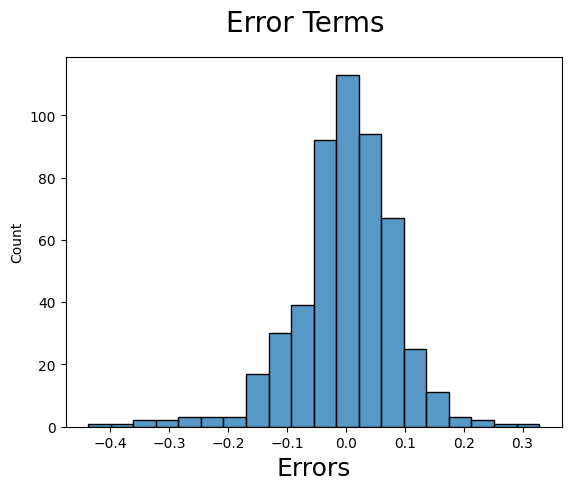

In [141]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

### Applying the scaling on the test sets

In [142]:
bikesharedata.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',            1,            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12,
                  0,            1,            2,            3,            4,
                  5,            6,            1,            2,            3,
                  1,            2,            3,            4],
      dtype='object')

In [143]:
num_vars = ['yr','temp', 'atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [144]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt           1           2  ...           4  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.077626    0.100457  ...    0.164384   
std      0.159947    0.218435    0.268194    0.301297  ...    0.371472   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

                5           6           1           2           3           1  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.178082    0.118721    0.652968    0.319635    0.027397    0.255708   
std      0.383458    0.324202    0.477117    0.467403    0.163612    0.437258   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                2           3           4  
count  219.000000  219.000000  219.000000  
mean     0.264840    0.246575    0.232877  
std      0.442259    0.432005    0.423633  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 34 columns]

### Dividing into X_test and y_test


In [145]:
y_test = df_test.pop('cnt')
X_test = df_test

In [146]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [147]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4


X_test_m3 = X_test_m3.drop(["hum"], axis = 1)

In [148]:
# Making predictions using the thrid model

y_pred_m3 = lr_2.predict(X_test_m3)

# Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

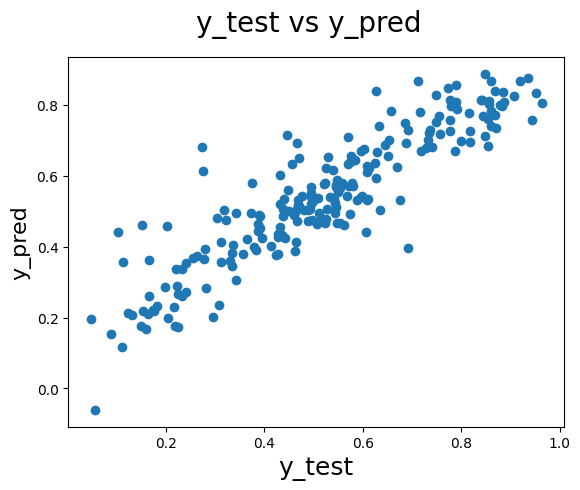

In [149]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:

cnt = 0.234 x yr -0.025 x holiday + 0.055 x workingday + 0.420 x atemp - 0.146 x humidity - 0.167 x windspeed

yr             0.2342      0.008     28.937      0.000       0.218       0.250
holiday       -0.0246      0.020     -1.237      0.217      -0.064       0.014
workingday     0.0552      0.009      6.073      0.000       0.037       0.073
atemp          0.4195      0.045      9.248      0.000       0.330       0.509
hum           -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed     -0.1686      0.026     -6.506      0.000      -0.219      -0.118

Overall we have a decent model, but we also acknowledge that we could do better.
I could have dropped a few more variables to get r2 above 0.85